In [1]:
import argparse
import math
from random import randint
import torch
from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from data_preprocessing import Feature_Selector_Dataset
import discharge_model 
from SeversonDataset_preprocess import train_val_split
from utils import *

In [2]:
def get_args_parser():
    parser = argparse.ArgumentParser('Discharge Model Feature Selector Training', add_help=False)
    parser.add_argument('--batch_size', default=128, type=int)
    parser.add_argument('--epochs', default=100, type=int)
    parser.add_argument('--seed', default=41, type=int)
    parser.add_argument('--detail_step', default=50, type=int)

    # Model parameters
    parser.add_argument('--model_name', default='Dim_Reduction_2', type=str) 
    parser.add_argument('--pred_target', default='chargetime', type=str) 
    parser.add_argument('--finetune', default=False, type=bool)   
    parser.add_argument('--checkpoint', default='.pth', type=str)                  

    # Hyperparameters
    parser.add_argument('--weight_decay', type=float, default=1e-4)
    parser.add_argument('--lr', type=float, default=1e-4, metavar='LR')
    parser.add_argument('--lr_schedule', type=bool, default=True, metavar='LR')
    parser.add_argument('--min_lr', type=float, default=1e-5, metavar='LR')
    parser.add_argument('--warm_up', type=int, default=10, metavar='LR')
    parser.add_argument('--delta', type=int, default=1)

    return parser

 -- GPU is available -- 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 500]           5,760
              Mish-2             [-1, 128, 500]               0
            Conv1d-3             [-1, 128, 500]         180,352
              Mish-4             [-1, 128, 500]               0
            Conv1d-5             [-1, 128, 500]          82,048
              Mish-6             [-1, 128, 500]               0
            Conv1d-7             [-1, 128, 500]          82,048
              Mish-8             [-1, 128, 500]               0
         AvgPool1d-9             [-1, 128, 250]               0
        AvgPool1d-10             [-1, 128, 250]               0
   SpatialDropout-11             [-1, 256, 250]               0
           Conv1d-12             [-1, 128, 250]          98,432
             Mish-13             [-1, 128, 250]               0
           Con

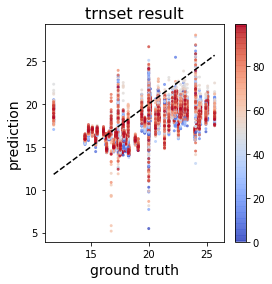

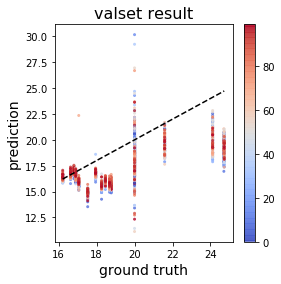

epoch:[2 / 100] batch:[50 / 72] loss: 0.885 lr: 2.000e-05
trn_loss: 1.177, val_loss: 0.939
real RMSE: 2.53, MAPE: 0.10


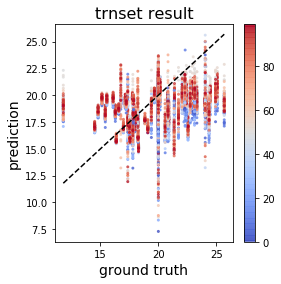

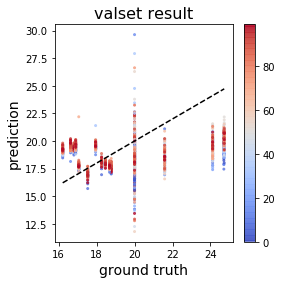

epoch:[3 / 100] batch:[50 / 72] loss: 0.834 lr: 3.000e-05
trn_loss: 0.685, val_loss: 0.506
real RMSE: 1.86, MAPE: 0.07


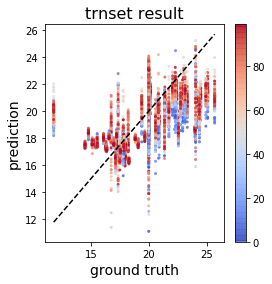

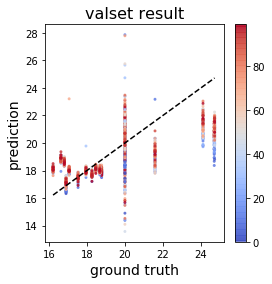

epoch:[4 / 100] batch:[50 / 72] loss: 0.849 lr: 4.000e-05
trn_loss: 0.772, val_loss: 0.572
real RMSE: 1.98, MAPE: 0.07
epoch:[5 / 100] batch:[50 / 72] loss: 0.742 lr: 5.000e-05
trn_loss: 0.752, val_loss: 0.538
real RMSE: 1.92, MAPE: 0.08
epoch:[6 / 100] batch:[50 / 72] loss: 1.179 lr: 6.000e-05
trn_loss: 0.817, val_loss: 0.527
real RMSE: 1.90, MAPE: 0.07
epoch:[7 / 100] batch:[50 / 72] loss: 1.020 lr: 7.000e-05
trn_loss: 0.580, val_loss: 0.452
real RMSE: 1.76, MAPE: 0.07


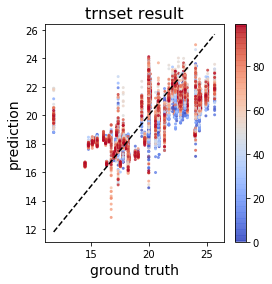

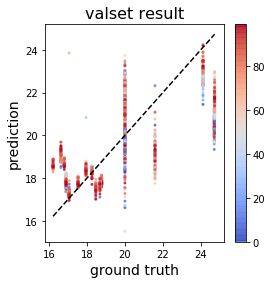

epoch:[8 / 100] batch:[50 / 72] loss: 0.569 lr: 8.000e-05
trn_loss: 0.840, val_loss: 0.660
real RMSE: 2.12, MAPE: 0.07
epoch:[9 / 100] batch:[50 / 72] loss: 0.902 lr: 9.000e-05
trn_loss: 0.568, val_loss: 0.416
real RMSE: 1.68, MAPE: 0.07


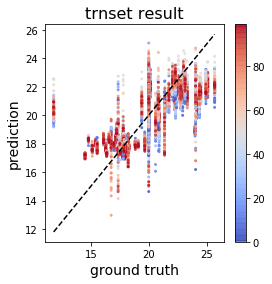

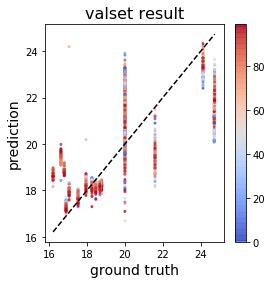

epoch:[10 / 100] batch:[50 / 72] loss: 0.868 lr: 1.000e-04
trn_loss: 1.681, val_loss: 1.383
real RMSE: 3.07, MAPE: 0.12
epoch:[11 / 100] batch:[50 / 72] loss: 0.993 lr: 9.997e-05
trn_loss: 1.237, val_loss: 1.027
real RMSE: 2.65, MAPE: 0.09
epoch:[12 / 100] batch:[50 / 72] loss: 0.563 lr: 9.989e-05
trn_loss: 0.768, val_loss: 0.639
real RMSE: 2.09, MAPE: 0.07
epoch:[13 / 100] batch:[50 / 72] loss: 0.707 lr: 9.975e-05
trn_loss: 0.588, val_loss: 0.428
real RMSE: 1.71, MAPE: 0.07
epoch:[14 / 100] batch:[50 / 72] loss: 0.819 lr: 9.956e-05
trn_loss: 0.585, val_loss: 0.411
real RMSE: 1.68, MAPE: 0.06


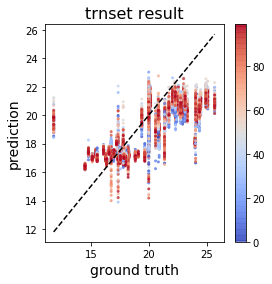

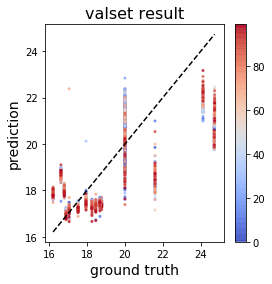

epoch:[15 / 100] batch:[50 / 72] loss: 0.621 lr: 9.932e-05
trn_loss: 1.024, val_loss: 0.803
real RMSE: 2.34, MAPE: 0.09
epoch:[16 / 100] batch:[50 / 72] loss: 0.634 lr: 9.902e-05
trn_loss: 0.565, val_loss: 0.507
real RMSE: 1.86, MAPE: 0.07
epoch:[17 / 100] batch:[50 / 72] loss: 0.434 lr: 9.866e-05
trn_loss: 0.767, val_loss: 0.551
real RMSE: 1.94, MAPE: 0.07
epoch:[18 / 100] batch:[50 / 72] loss: 0.793 lr: 9.826e-05
trn_loss: 0.531, val_loss: 0.495
real RMSE: 1.84, MAPE: 0.07
epoch:[19 / 100] batch:[50 / 72] loss: 0.566 lr: 9.780e-05
trn_loss: 0.609, val_loss: 0.477
real RMSE: 1.80, MAPE: 0.07
epoch:[20 / 100] batch:[50 / 72] loss: 0.531 lr: 9.729e-05
trn_loss: 0.565, val_loss: 0.470
real RMSE: 1.79, MAPE: 0.07
epoch:[21 / 100] batch:[50 / 72] loss: 0.507 lr: 9.672e-05
trn_loss: 0.518, val_loss: 0.399
real RMSE: 1.65, MAPE: 0.07


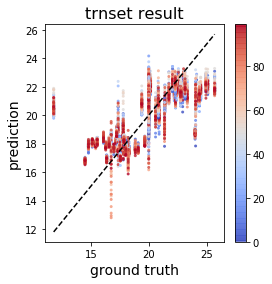

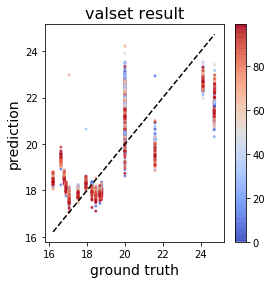

epoch:[22 / 100] batch:[50 / 72] loss: 0.636 lr: 9.611e-05
trn_loss: 0.639, val_loss: 0.561
real RMSE: 1.96, MAPE: 0.07
epoch:[23 / 100] batch:[50 / 72] loss: 0.439 lr: 9.545e-05
trn_loss: 0.646, val_loss: 0.557
real RMSE: 1.95, MAPE: 0.07
epoch:[24 / 100] batch:[50 / 72] loss: 0.474 lr: 9.473e-05
trn_loss: 0.554, val_loss: 0.428
real RMSE: 1.71, MAPE: 0.07
epoch:[25 / 100] batch:[50 / 72] loss: 0.499 lr: 9.397e-05
trn_loss: 0.739, val_loss: 0.574
real RMSE: 1.98, MAPE: 0.07
epoch:[26 / 100] batch:[50 / 72] loss: 0.470 lr: 9.316e-05
trn_loss: 0.561, val_loss: 0.500
real RMSE: 1.85, MAPE: 0.07
epoch:[27 / 100] batch:[50 / 72] loss: 0.494 lr: 9.231e-05
trn_loss: 0.573, val_loss: 0.480
real RMSE: 1.81, MAPE: 0.07
epoch:[28 / 100] batch:[50 / 72] loss: 0.466 lr: 9.141e-05
trn_loss: 0.663, val_loss: 0.580
real RMSE: 1.99, MAPE: 0.07
epoch:[29 / 100] batch:[50 / 72] loss: 0.562 lr: 9.046e-05
trn_loss: 0.601, val_loss: 0.545
real RMSE: 1.93, MAPE: 0.08
epoch:[30 / 100] batch:[50 / 72] loss: 0

trn_loss: 0.469, val_loss: 0.489
real RMSE: 1.83, MAPE: 0.07
epoch:[91 / 100] batch:[50 / 72] loss: 0.472 lr: 1.220e-05
trn_loss: 0.494, val_loss: 0.507
real RMSE: 1.86, MAPE: 0.07
epoch:[92 / 100] batch:[50 / 72] loss: 0.458 lr: 1.174e-05
trn_loss: 0.470, val_loss: 0.511
real RMSE: 1.87, MAPE: 0.07
epoch:[93 / 100] batch:[50 / 72] loss: 0.443 lr: 1.134e-05
trn_loss: 0.475, val_loss: 0.502
real RMSE: 1.85, MAPE: 0.08
epoch:[94 / 100] batch:[50 / 72] loss: 0.374 lr: 1.098e-05
trn_loss: 0.471, val_loss: 0.501
real RMSE: 1.85, MAPE: 0.08
epoch:[95 / 100] batch:[50 / 72] loss: 0.506 lr: 1.068e-05
trn_loss: 0.499, val_loss: 0.533
real RMSE: 1.91, MAPE: 0.08
epoch:[96 / 100] batch:[50 / 72] loss: 0.348 lr: 1.044e-05
trn_loss: 0.473, val_loss: 0.518
real RMSE: 1.88, MAPE: 0.07
epoch:[97 / 100] batch:[50 / 72] loss: 0.504 lr: 1.025e-05
trn_loss: 0.486, val_loss: 0.531
real RMSE: 1.90, MAPE: 0.08
epoch:[98 / 100] batch:[50 / 72] loss: 0.379 lr: 1.011e-05
trn_loss: 0.493, val_loss: 0.545
real RM

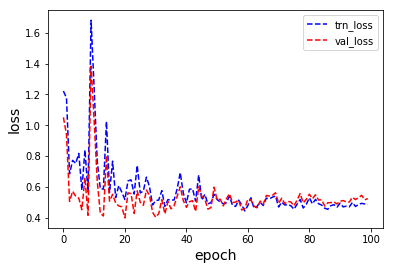

In [3]:
args = get_args_parser()
args, unknown = args.parse_known_args()
if torch.cuda.is_available():
    print(" -- GPU is available -- ")

# 根據random seed，隨機分割訓練及測試集
train_val_split(seed=args.seed)

trn_set = Feature_Selector_Dataset(train=True, pred_target=args.pred_target, part='discharge', norm=True)
val_set = Feature_Selector_Dataset(train=False, pred_target=args.pred_target, part='discharge', norm=True)
trn_loader = DataLoader(trn_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=True)
val_loader = DataLoader(val_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=False)

model = discharge_model.__dict__[args.model_name](4, 1, 0.16).apply(init_weights).cuda()
if args.finetune:
    model.load_state_dict(torch.load(args.checkpoint))
summary(model, (4, 500))

optimizer = optim.AdamW(model.parameters(), lr=args.lr, amsgrad=True, weight_decay=args.weight_decay)
criterion = nn.MSELoss()
# criterion = nn.HuberLoss(delta=args.delta)

best_rmse, best_mape = 1000, 1000
trn_loss_record, val_loss_record = [], []
for epoch in range(args.epochs):
    model.train()
    step = 0
    n_minibatch = math.ceil(len(trn_set)/args.batch_size)
    if args.lr_schedule:
        adjust_learning_rate(optimizer, args.epochs, epoch+1, args.warm_up, args.lr, args.min_lr)
    for inputs, targets in trn_loader:
        step += 1
        optimizer.zero_grad()
        outputs = model(inputs.cuda().float())
        loss = criterion(outputs, targets.reshape(-1, 1).cuda().float())
        loss.backward()
        optimizer.step()
        if step%args.detail_step==0:
            print('epoch:[%d / %d] batch:[%d / %d] loss: %.3f lr: %.3e' % (epoch+1, args.epochs, step, n_minibatch, loss, optimizer.param_groups[0]["lr"]))

    # model evaluation per epoch
    model.eval()
    with torch.no_grad():
        trn_loss, trn_batch = 0, 0
        for inputs, targets in trn_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            trn_loss += loss
            trn_batch += 1
        val_loss, val_batch = 0, 0
        for inputs, targets in val_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            val_loss += loss
            val_batch += 1
        trn_loss_record.append((trn_loss/trn_batch).cpu())
        val_loss_record.append((val_loss/val_batch).cpu())
        print('trn_loss: %.3f, val_loss: %.3f' % ((trn_loss/trn_batch), (val_loss/val_batch)))

    # inverse transform to real target
    val_rmse, val_mape = real_RMSE_and_MAPE(model, val_loader, args.pred_target)
    print('real RMSE: %.2f, MAPE: %.2f' % (val_rmse, val_mape))
    if val_rmse < best_rmse:
        best_rmse, best_mape = val_rmse, val_mape
        pred_result(model, trn_set, 'trn', args.pred_target)        
        pred_result(model, val_set, 'val', args.pred_target)
        torch.save(model.state_dict(), args.model_name+'_seed'+str(args.seed)+'.pth')

# training finished
loss_profile(trn_loss_record, val_loss_record)